<a href="https://colab.research.google.com/github/NuraddinQJ/AiDojo-Bootcamp/blob/main/Week3_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learnong
## Scikit - Learn

In [4]:
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 65.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import (
    datasets,
    model_selection,
    linear_model,
    metrics,
    preprocessing,
)

from sklearn.pipeline import Pipeline


In [8]:
from sklearn.datasets import load_wine

# Load the Wine Dataset
data = load_wine()

In [10]:
len(data.data)

178

In [15]:
x = pd.DataFrame(data.data , columns=data.feature_names)
y = pd.DataFrame(data.target)

In [26]:
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [18]:
x.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [21]:
x.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [24]:
x.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [25]:
y.value_counts()

1    71
0    59
2    48
dtype: int64

In [43]:
y = np.array(y)
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


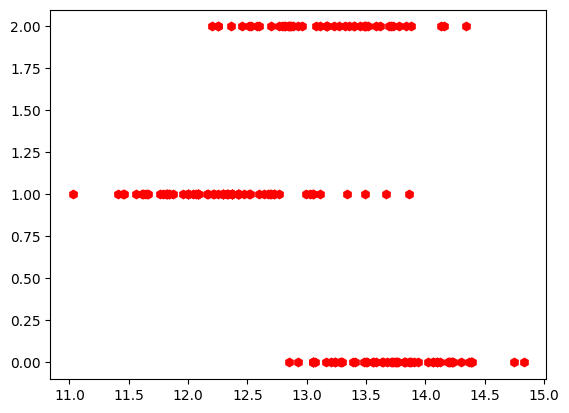

In [34]:
plt.plot(x.alcohol,y,"rh")
plt.show()

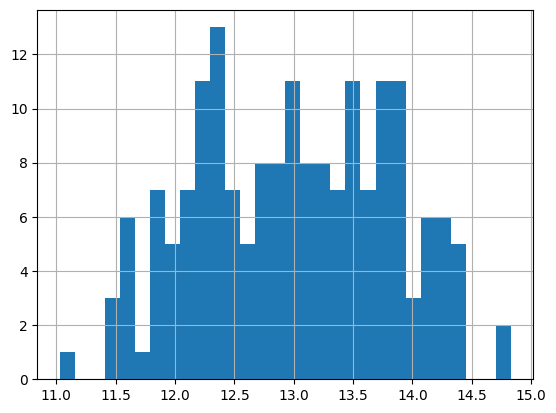

In [38]:
x_normalize = preprocessing.MinMaxScaler()
x_norm = x_normalize.fit_transform(x)

x_norm

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

# Train Test Split

In [39]:
# Data split
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y, test_size=0.5, random_state=42)

In [40]:
x_train.shape, y_train.shape

((89, 13), (89,))

In [49]:
model = linear_model.LogisticRegression()
model.fit(x_train, y_train.reshape(-1))

LogisticRegression()

In [51]:
y_pred = model.predict(x_test[:2])
y_pred

array([0, 0])

In [47]:
model.score(x_test, y_test)

0.9887640449438202

In [50]:
metrics.accuracy_score(y_test , y_pred)

ValueError: ignored

# Real World Example

In [125]:
x = np.arange(0, 100).reshape(-1, 1)

In [126]:
y = x*4+3

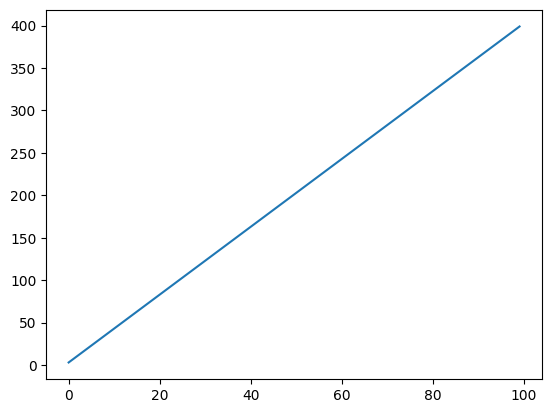

In [127]:
plt.plot(x, y)
plt.show()

In [128]:
# normaliz the data
x.shape,y.shape

((100, 1), (100, 1))

In [129]:
x_normalize = preprocessing.MinMaxScaler()
x_norm = x_normalize.fit_transform(x)

y_normalize = preprocessing.MinMaxScaler()
y_norm = y_normalize.fit_transform(y)


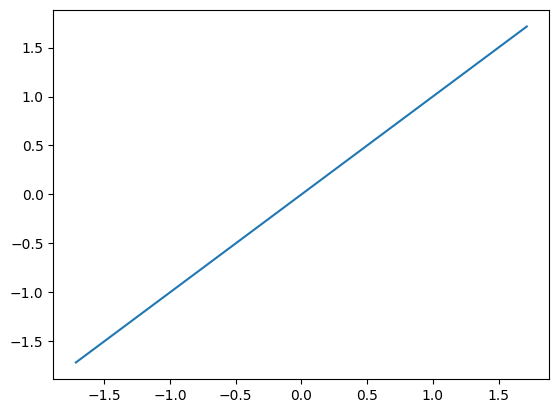

In [130]:
plt.plot(x_norm,y_norm)
plt.show()

In [131]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y_norm, test_size=0.2, random_state=42)

In [132]:
#data shape
x_train.shape, y_train.shape

((80, 1), (80, 1))

In [133]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [143]:
y_pred = model.predict(x_test[0].reshape(-1,1))


In [144]:
y_pred


array([[1.16053207]])

In [136]:
y_test[0]

array([1.16053207])

In [137]:
model.score(x_test, y_test)

1.0

In [138]:
x_test[0]

array([1.16053207])

In [150]:
# invesing normlaing
y_pred = model.predict(x_test)

In [152]:
x_pred = x_normalize.inverse_transform(x_test)
y_pred = y_normalize.inverse_transform(y_test)

In [141]:
x_pred[:10],y_pred[:10]

(array([[83.],
        [53.],
        [70.],
        [45.],
        [44.],
        [39.],
        [22.],
        [80.],
        [10.],
        [ 0.]]),
 array([[335.],
        [215.],
        [283.],
        [183.],
        [179.],
        [159.],
        [ 91.],
        [323.],
        [ 43.],
        [  3.]]))

In [157]:
out = model.predict([[100]])
out

array([[100.]])